In [73]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
from scipy import stats
import pandas as pd

In [74]:
X1 = pd.read_excel(open('table.xls', 'rb'), sheet_name='A - aaup')['A5'].to_numpy()
X2 = pd.read_excel(open('table.xls', 'rb'), sheet_name='A - aaup')['A8'].to_numpy()

## $Z = \frac{H - \frac{1}{2}}{\sqrt(\frac{1}{4n})} = 2\sqrt(n)(H - \frac{1}{2})$
## $Z = \frac{1}{\sqrt(2\pi)\sigma}exp(-\frac{(x - \mu)^2}{2\sigma^2})$

In [75]:
stats.wilcoxon(X1, X2)

WilcoxonResult(statistic=0.0, pvalue=4.110515034106515e-177)

In [76]:
def two_sample_chisquare(dist1, dist2, bins=11):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)

In [77]:
two_sample_chisquare(X1, X2)

(153.68768656112596, 0.0)

In [78]:
stored1 = []
freq1,division1 = np.histogram(X1, bins=11)
for i in range(len(freq1)):
    stored1.append(freq1[i]/len(X1))
    print(freq1[i], round(freq1[i]/len(X1), 3))
division1

28 0.026
118 0.11
227 0.212
277 0.258
171 0.159
123 0.115
80 0.075
31 0.029
7 0.007
7 0.007
4 0.004


array([ 270.        ,  337.18181818,  404.36363636,  471.54545455,
        538.72727273,  605.90909091,  673.09090909,  740.27272727,
        807.45454545,  874.63636364,  941.81818182, 1009.        ])

In [79]:
stored2 = []
freq2,division2 = np.histogram(X2, bins=11)
for i in range(len(freq2)):
    stored2.append(freq2[i]/len(X2))
    print(freq2[i], round(freq2[i]/len(X2), 3))
division2

30 0.028
172 0.16
290 0.27
255 0.238
145 0.135
118 0.11
40 0.037
13 0.012
6 0.006
2 0.002
2 0.002


array([232.        , 289.63636364, 347.27272727, 404.90909091,
       462.54545455, 520.18181818, 577.81818182, 635.45454545,
       693.09090909, 750.72727273, 808.36363636, 866.        ])

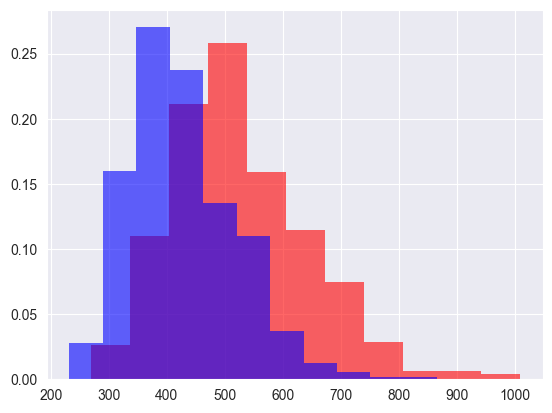

In [91]:
X3, bins3 = np.histogram(X1, bins=11)
plt.stairs(X3 / len(X1), edges=bins3, fill=True, color='red', alpha=0.6)
X4, bins4 = np.histogram(X2, bins=11)
plt.stairs(X4 / len(X2), edges=bins4, fill=True, color='blue', alpha=0.6)
plt.show()

In [82]:
stored1, stored2

([0.0260950605778192,
  0.10997204100652376,
  0.21155638397017706,
  0.2581547064305685,
  0.15936626281453867,
  0.11463187325256291,
  0.07455731593662628,
  0.028890959925442685,
  0.0065237651444548,
  0.0065237651444548,
  0.003727865796831314],
 [0.027958993476234855,
  0.1602982292637465,
  0.2702702702702703,
  0.23765144454799628,
  0.13513513513513514,
  0.10997204100652376,
  0.03727865796831314,
  0.012115563839701771,
  0.005591798695246971,
  0.001863932898415657,
  0.001863932898415657])